In [33]:
#importar librerias 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

#Importar base de datos
df = pd.read_csv("zara.csv", delimiter=";") 
print (df.head())

   Product ID Product Position Promotion Product Category Seasonal  \
0      185102            Aisle        No         Clothing       No   
1      188771            Aisle        No         Clothing       No   
2      180176          End-cap       Yes         Clothing      Yes   
3      112917            Aisle       Yes         Clothing      Yes   
4      192936          End-cap        No         Clothing      Yes   

   Sales Volume brand                                                url  \
0          2823  Zara  https://www.zara.com/us/en/basic-puffer-jacket...   
1           654  Zara  https://www.zara.com/us/en/tuxedo-jacket-p0889...   
2          2220  Zara  https://www.zara.com/us/en/slim-fit-suit-jacke...   
3          1568  Zara  https://www.zara.com/us/en/stretch-suit-jacket...   
4          2942  Zara  https://www.zara.com/us/en/double-faced-jacket...   

                sku                  name  \
0   272145190-250-2   BASIC PUFFER JACKET   
1  324052738-800-46         TUXE

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product ID        252 non-null    int64  
 1   Product Position  252 non-null    object 
 2   Promotion         252 non-null    object 
 3   Product Category  252 non-null    object 
 4   Seasonal          252 non-null    object 
 5   Sales Volume      252 non-null    int64  
 6   brand             252 non-null    object 
 7   url               252 non-null    object 
 8   sku               252 non-null    object 
 9   name              251 non-null    object 
 10  description       250 non-null    object 
 11  price             252 non-null    float64
 12  currency          252 non-null    object 
 13  scraped_at        252 non-null    object 
 14  terms             252 non-null    object 
 15  section           252 non-null    object 
dtypes: float64(1), int64(2), object(13)
memory u

In [35]:
df.shape

(252, 16)

In [36]:
df.describe()

,Product ID,Sales Volume,price
count,252.000000,252.000000,252.000000
mean,153370.503968,1823.702381,86.252540
std,26160.444549,697.703748,52.083205
min,110075.000000,529.000000,7.990000
25%,131053.750000,1243.000000,49.900000
50%,151681.500000,1839.500000,79.900000
75%,175669.750000,2398.750000,109.000000
max,199631.000000,2989.000000,439.000000


                                 Visualización de las variables
                                           categóricas

<Axes: xlabel='Product Position', ylabel='count'>

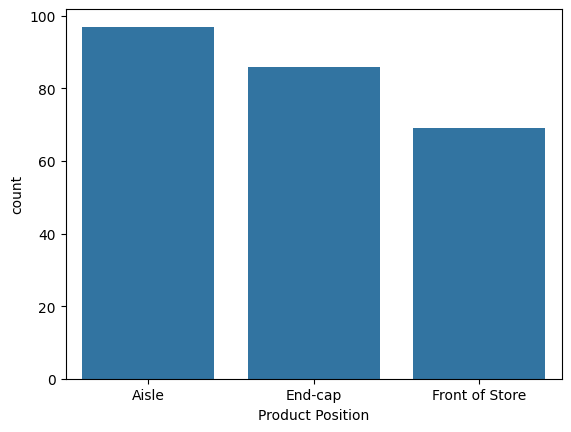

In [37]:
sns.countplot(x="Product Position",data=df)


En la variable MSSubClass la cual identifica el tipo de vivienda objeto de venta, se puede ver que del total de casas del dataset más de 500 casas son del tipo 1-STORY 1946 & NEWER ALL STYLES, seguidas de 2-STORY 1946 & NEWER con aproximadamente 300 casas, con lo cual se concluye que la mayoría de las personas prefieren comprar este tipo de casas a diferencia de las demás que se ofrecen en el mercado

<Axes: xlabel='Promotion', ylabel='count'>

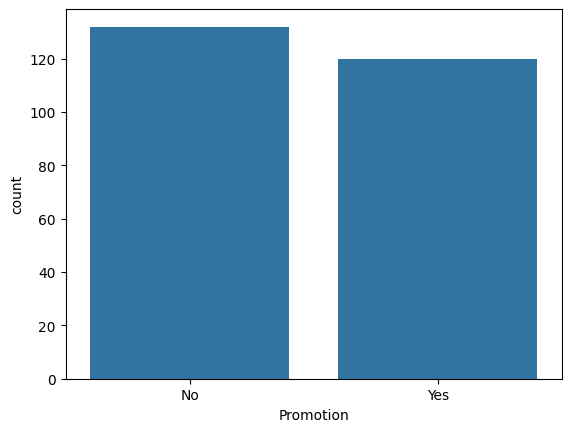

In [38]:

sns.countplot(x="Promotion",data=df)

La variable MSZoning Identifica la clasificación general de zonificación de la venta se puede apreciar que aproximadamente 1100 casas son residenciales de baja densidad lo cual significa que del 100% de las casas el 75% corresponden a este tipo, con lo cual se puede concluir que las personas prefieren comprar las casas en esta zonificación especifica. 

<Axes: xlabel='Seasonal', ylabel='count'>

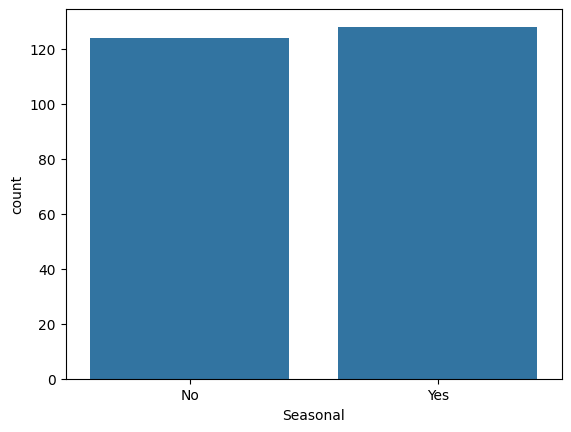

In [39]:

sns.countplot(x="Seasonal",data=df)

En variable de LotConfig se hace referencia a la configuración del lote, es decir, si el lote es esquinero o esta en la mitad de 2 casas, entre otras. Se concluye que aproximadamente 1050 lotes corresponden a la variable Inside que significa lote interior, con lo cual los clientes prefieren en su mayoría esta distribución para la elección de sus casas.

<Axes: xlabel='terms', ylabel='count'>

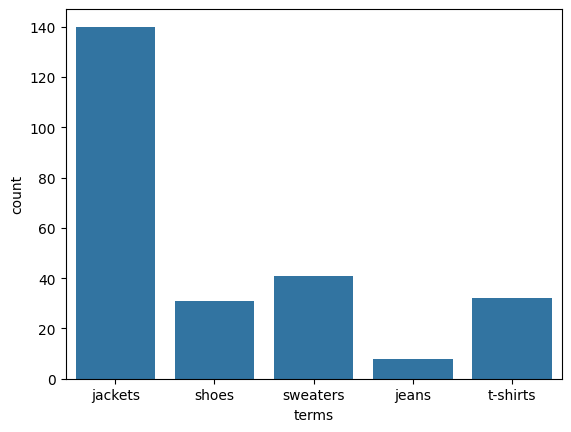

In [40]:
sns.countplot(x="terms",data=df)



<Axes: xlabel='section', ylabel='count'>

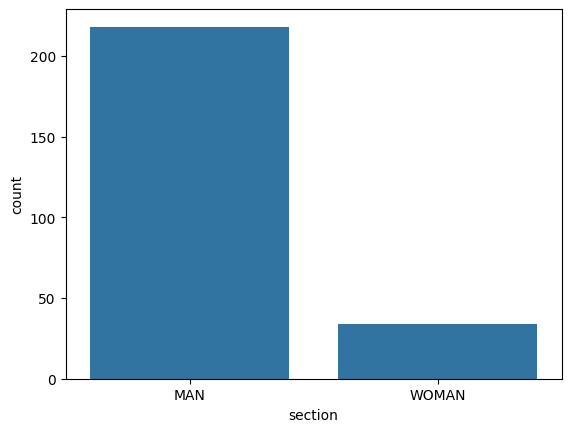

In [41]:
sns.countplot(x="section",data=df)

La variable Neighborhood   muestra la ubicación física dentro de los límites de la ciudad de Ames podemos concluir que los vecindarios donde mayores casas hay vendidas son North Ames con 225, College Creek con 150, Old Town con 113 y Edwards con 100. Las cuales representa el 40% del total de casas vendidas en la ciudad de Ames.

                                 Visualización de las variables 
                                numéricas y tratamiento de outliers                   

En las variables numéricas se realizaron los diagramas de cajas o boxplot las cuales permiten visualizar los valores atípicos de una serie de datos, que son valores extremadamente amplios o bajos en comparación con los demás datos de la gráfica. Además, el boxplot indica los cuartiles y la mediana de los valores. Luego, se hizo el tratamiento de “outliers” para cada variable, es decir se eliminó los valores atípicos para poder mejorar la precisión del modelo al momento de hacer la regresión lineal múltiple.
En cuanto a poder eliminar los outliers es necesario primero seleccionar la variable numérica y luego calcular el rango intercuartílico (IQR); en donde el primer cuartil es el 25% del percentil y el tercer cuartil es el 75% del percentil. Luego de hacer esto, se calculan los limites del boxplot y se filtran los datos y por ultimo se crean los boxplot para visualizar los datos originales y filtrados. A continuación, se muestra las variables numéricas originales y al lado con el tratamiento de datos.


<Axes: ylabel='Sales Volume'>

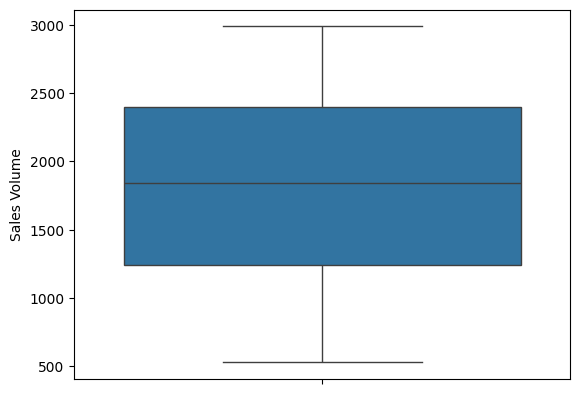

In [42]:
sns.boxplot(y="Sales Volume",data=df)

                                 Correlaciones                  

Se realizo las correlaciones de todas las variables del Dataset con el objetivo de poder analizar datos, identificando relaciones entre las variables. Además, se generó validaciones en el modelo con la meta de proporcionar buenas medidas predictoras. Por otro lado, los valores de la correlación varían entre -1 y 1. Es decir, que si el valor de una variable esta cercana a uno, la otra tiende a aumentar, pero si esta cercana a -1 tiende a disminuir.

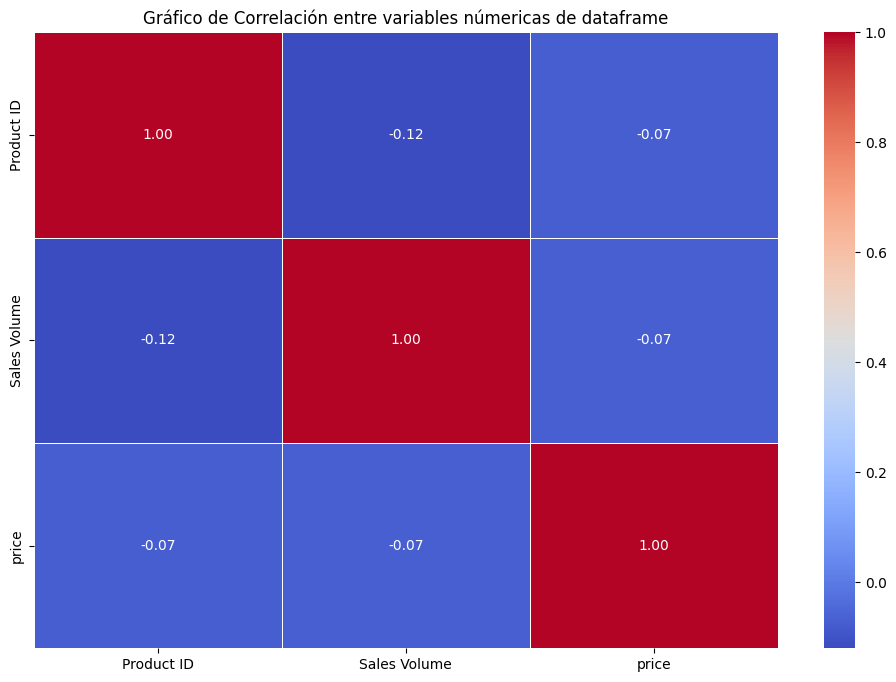

In [43]:
variables_numericas= ["Product ID","Sales Volume","price"]

matriz_correlacion=df[variables_numericas].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Gráfico de Correlación entre variables númericas de dataframe")
plt.show()

Para la variable dependiente precio de venta podemos ver que las variables independientes que mayor correlacion positiva y negativa tienen respectivamente son  GrLivArea y KitchenAbvGr las cuales son Superficie habitable sobre el nivel del suelo (suelo) en pies cuadrados y cantidad de cocinas superiores 

                            Creación de variables Dummies

En este paso lo que se realiza es que las variables categóricas se pasan a numéricas. Es decir, se vuelven 0 y 1 para poder evitar posibles errores

In [44]:
df= pd.get_dummies(df,drop_first=True)
#Pasamos los datos boolenaos de True/Flase a 1/0.
df = df.astype(int)

                             Regresión Lineal Multiple
                                  método rápido
                                

In [45]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sn

X_multi=df.drop(columns=["Sales Volume"],axis=1)
X_multi.head()
y_multi = df["Sales Volume"].astype(float)
X_multi_cons=sn.add_constant(X_multi)
lm_multi=sn.OLS(y_multi, X_multi_cons).fit()
lm_multi.summary()

C:\Users\aleja\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\regression\linear_model.py:1795: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\aleja\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\regression\linear_model.py:1795: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\aleja\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\regression\linear_model.py:1717: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Sales Volume   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 03 Mar 2024   Prob (F-statistic):                nan
Time:                        12:16:52   Log-Likelihood:                 4038.0
No. Observations:                 252   AIC:                            -7572.
Df Residuals:                       0   BIC:                            -6683.
Df Model:                         251                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================================================================================================================================================================================================================================================================================================
                                                                                                                                                                                                                                                                                                                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                                                                                                                                                                                                                                                  1352.8466        inf          0        nan         nan         nan
Product ID                                                                                                                                                                                                                                                                                                                                0.0026        inf          0        nan         nan         nan
price                                                                                                                                                                                                                                                                                                                                    -0.3389        inf         -0        nan         nan         nan
Product Position_End-cap                                                                                                                                                                                                                                                                                                                 36.0151        inf          0        nan         nan         nan
Product Position_Front of Store                                                                                                                                                                                                                                                                                                      